In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

# Lab 1  
## Problem 1
- 1.A 
  - Standard normal distribution, also called gaussian with mean = 0 and sigma = 1, is defined by the probability density function  
  $$ P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/\left(2\sigma^2\right)} $$
  - The normal distribution is the limiting case of the discrete binomial distribution as the sample size N becomes large
  - The cumulative distribution function which is equal to the integral of the above gives the probability that a variate will assumw a value less than or equal to x. 
  - The normal distribution is widely used to approximate the distribution of variates with unknown distributions is physics and astronomy. This works as a decent approximation because of the central limit theorem which states that the average of the means of many samples from any arbitrary distribtuion with well defined mean and variance tends to be a normal distribution. 


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)



- 1.B 

In [2]:
sigma = [-1, 1, 2, 3, 5]
d = []
for i in sigma:
    d.append(stats.norm.cdf(i, loc = 0, scale = 1))
    print(d[-1])

0.15865525393145707
0.8413447460685429
0.9772498680518208
0.9986501019683699
0.9999997133484281


Using the z table found [here](https://www.ztable.net/), the above probabilities correspond to those on the z table for sigma = -1, 1, 2, 3, and 5 verifying the results of the stats.norm.cdf function.

- 1.C to calculate sigma values, I used the probabilities  calculated above for sigma =  -1, 1, 2, 3 and 5. 

In [6]:
for p in d: 
    sig = stats.norm.ppf(p, loc = 0, scale = 1)
    print(sig)

-1.0
1.0
2.0000000000000004
2.9999999999999982
4.999999999970176


- 1.D For any probabilities less than 50%, the percent point function returns a value less than one for the standard normal distribution since 50% of the probability lies between negative infinity and 0. 

## Problem 2 

- 2.A: Chi-squared Distribution
  - The Chi Squared distribution is the sum of k independent standard normal distributions squared. It is determined only by the degrees of freedom k. The Chi squared distribution is widely used in inferential statistics for hypothesis testing, chi squared goodness of fit tests, and in confidence interval estimation for a population standard deviation of a normal distribution from a sample standard deviation. The probability density function of the chi squared distribution with $k$ degrees of freedom is given by 
  $$ P(x) =  \int_{-\infty}^{x} \frac{x^{k/2-1}e^{-x/2}}{\Gamma\left(\frac{1}{2}k\right)2^{k/2}} \,dx  $$


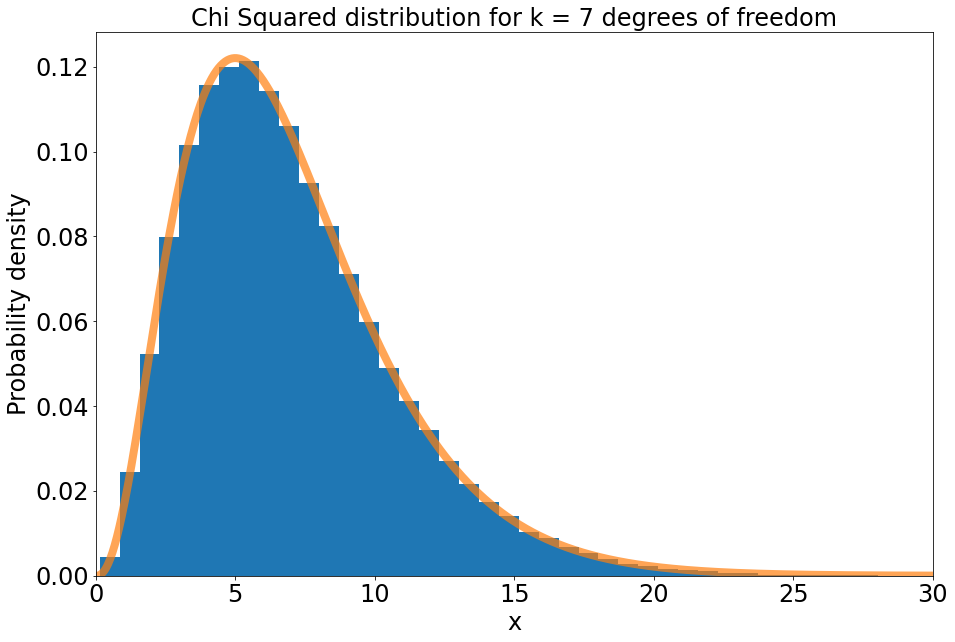

In [4]:
d = stats.chi2.rvs(df = 7, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0, 30])
x = np.linspace(0,40,1000)
ax.plot(x, stats.chi2.pdf(x, df = 7),linewidth = 8,alpha = 0.7)
plt.xlabel("x", fontsize = 24)
plt.ylabel("Probability density", fontsize = 24)
plt.title("Chi Squared distribution for k = 7 degrees of freedom", fontsize = 24)
plt.show()




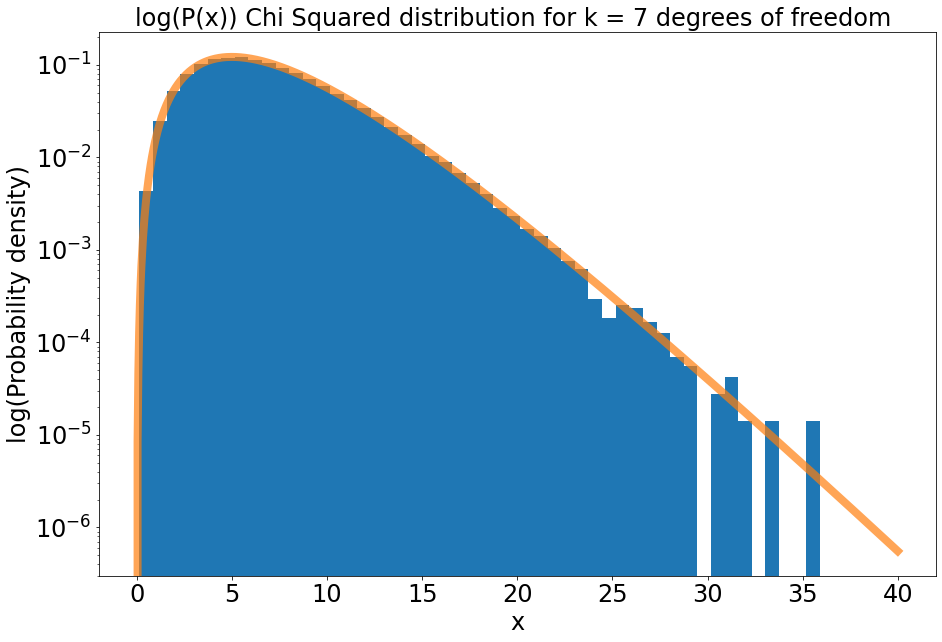

In [6]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlabel("x", fontsize = 24)
plt.ylabel("log(Probability density)", fontsize = 24)
plt.title("log(P(x)) Chi Squared distribution for k = 7 degrees of freedom ", fontsize = 24)

x = np.linspace(0, 40,1000)
ax.plot(x,stats.chi2.pdf(x,df = 7),linewidth = 8,alpha = 0.7)
plt.show()

## Problem 3
- 3.A The value I selected as my hypothetical measurement is x = 33. 
- 3.B If there is no signal and the signal free data is represented by a chi2 distribution, what is the probability that the data produces a signal x = 33 or greater?
- 3.C This question is equivalent to computing the integral with k = 7 degrees of freedom  
$$ P(30) =  \int_{33}^{\infty} \frac{x^{k/2-1}e^{-x/2}}{\Gamma\left(\frac{1}{2}k\right)2^{k/2}} \,dx  $$

- 3.D Integrals of the chi squared distribution can be calculated using the `stats.chi2.cdf` function for integrals from $-\infty$ to $x$. The probability we are interested in is from $x$ to $\infty$. This integral can be calculated by `1-cdf(x)`. This method for high values of x is prone to numerical errors. For this reason the survival function `stats.chi2.sf` which is defined as `1-cdf(x)` is used to calculate the above integral and has the advantage of bieng more accurate at higher values of x.

In [8]:
prob = stats.chi2.sf(33, df = 7)
print(prob)

2.6476442940650662e-05


- 3.E The above probability was calculated using the chi squared distribution. But sigma is a unit of probability related to the standard normal distribution.

In [11]:
sigma = stats.norm.ppf(1 - prob, loc = 0, scale = 1)
print("If the data was represented by a gaussian the",
      "probability of the background producing a signal of x = 33 is equivalent to a value of sigma =", sigma)


If the data was represented by a gaussian the probability of the background producing a signal of x = 33 is equivalent to a value of sigma = 4.042196243177667


## Problem 4
*Now explore a little bit. Try various measurement values and see how the probabilities and 'sigmas' change. Discuss the patters that you see.*

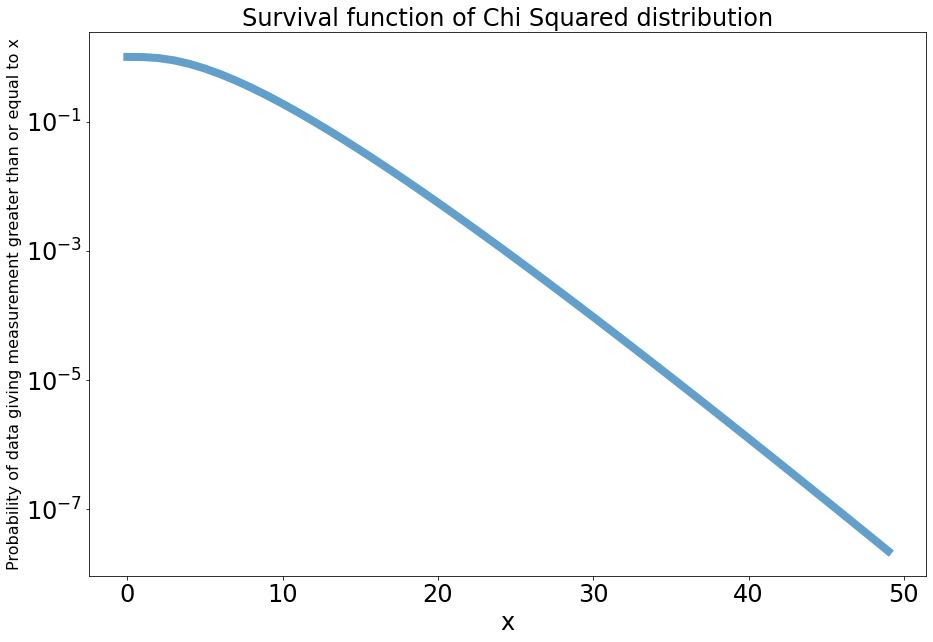

In [23]:
mments = range(0, 50, 1)


fig, ax = plt.subplots(1,1)
plt.tick_params(labelsize = 24)
plt.yscale("log")
plt.xlabel("x", fontsize = 24)
plt.ylabel("Probability of data giving measurement greater than or equal to x", fontsize = 16)
plt.title("Survival function of Chi Squared distribution", fontsize = 24)
ax.plot(mments, stats.chi2.sf(mments, df = 7), linewidth = 8,alpha = 0.7)

The above graph shows that for high values of x, the probability falls off nearly exponentailly. Furthermore because the chi squared takes on only positive values of x and as a result the probability of values greater than 0 is 1. 

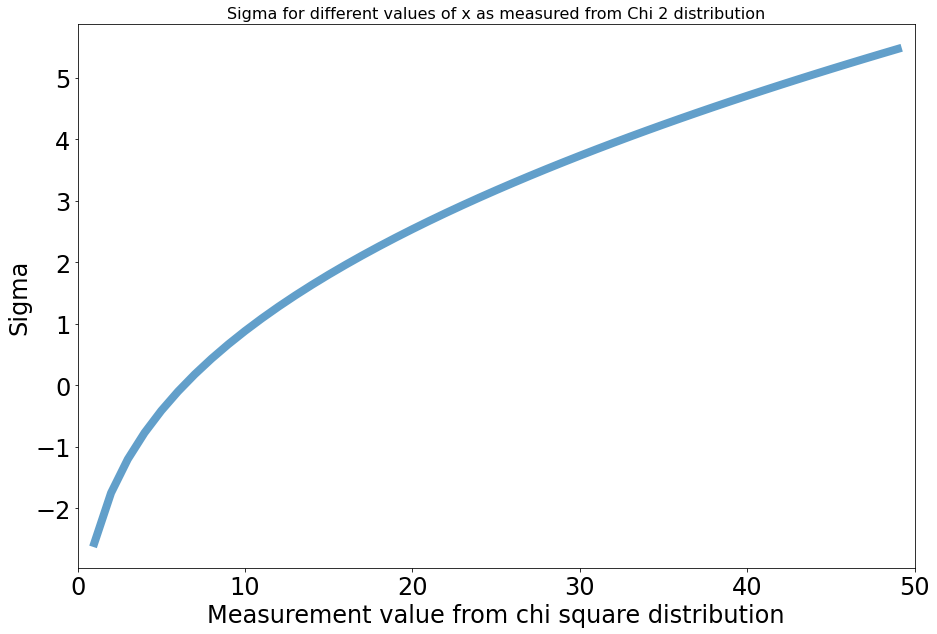

In [34]:

fig, ax = plt.subplots(1,1)

plt.tick_params(labelsize = 24)
plt.xlim([0, 50])
plt.ylabel("Sigma", fontsize = 24)
plt.xlabel("Measurement value from chi square distribution", fontsize = 24)
plt.title("Sigma for different values of x as measured from Chi 2 distribution", fontsize = 16)


ax.plot(mments, stats.norm.ppf(1 - stats.chi2.sf(mments, df = 7)), linewidth = 8,alpha = 0.7)

The above plots the values of sigma corresponding to the probability of a measurement of x if the data was represented by a standard normal distribution. For values close to 0, sigma is negative since the chi squared distribution does not take on negative values but the standard normal distribution does. As a result the fractions of probability less than 50% give negative values of sigma

# Non-Continuous Distributions  
## 1:  
- A 
  - The Binomial distribution is a discrete probability distribution where P(n|N) is the probability of obtaining n success out of N trials with each trial having probability p of success. The binomial distribution is defined by the number of independent trial N each with probability p of success. The discrete variate 
$$ P\left(n, N, p\right) = \binom{N}{n}p^n\left(1-p\right)^{N-n} $$
    - Has mean $\mu = Np $ and variance $ \sigma^2 = Nqp $
  - Poisson Distribution: 
    - The limit of the binomial distribution when the sample size N becomes large and viewing the distribution as a function of the expected number of successess v = Np
    - the probability n success given a success rate of v is given by  
    $$ P\left(n, v\right) = \frac{v^n e^{-v}}{n!} $$
    - has mean $ \mu = v $ and variance $ \sigma^2 = v $
- B. *Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful).*

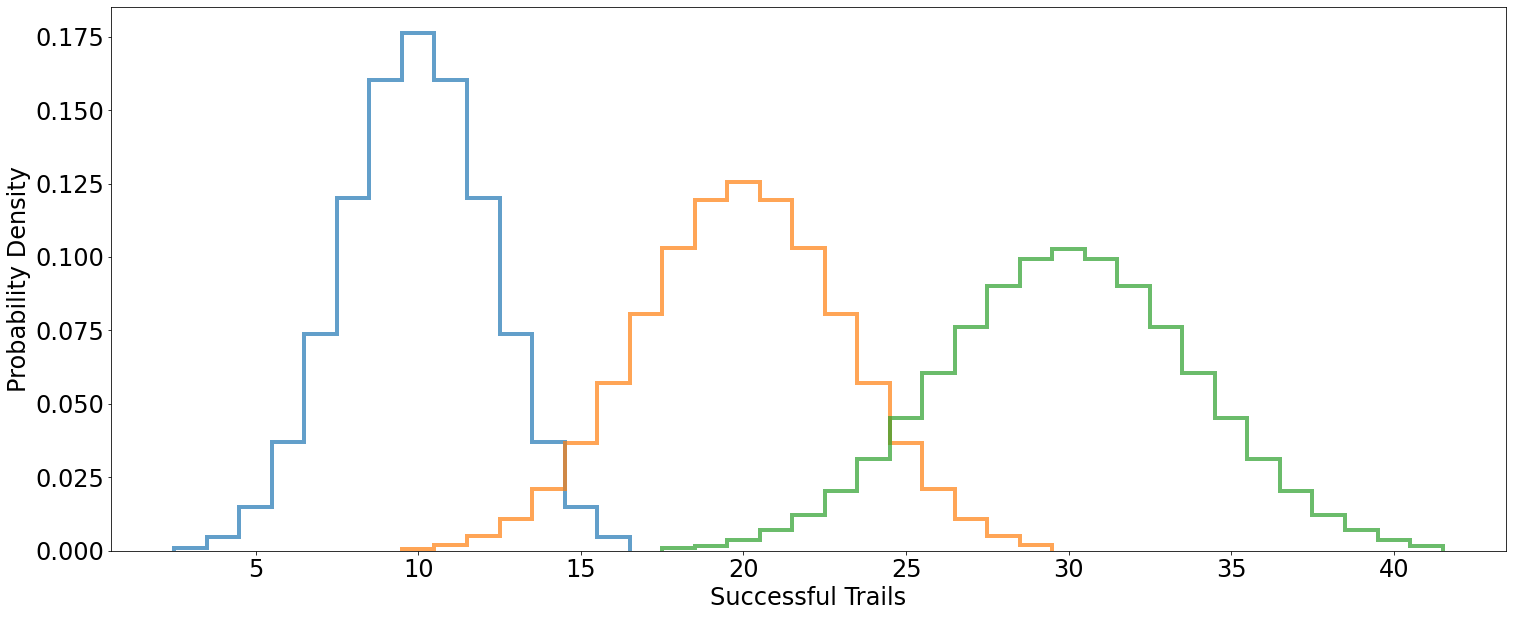

In [92]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)


n = [20, 40, 60]
p = 0.5
for i in n:
    x = np.arange(stats.binom.ppf(0.001, i, p),
                  stats.binom.ppf(0.999, i, p))
    edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)

    ax.stairs(stats.binom.pmf(x, i, p), edges, linewidth = 4, alpha = 0.7)

plt.xlabel("Successful Trails", fontsize = 24)
plt.ylabel("Probability Density", fontsize = 24);

The above plot shows three the binomial distributions for p = 0.5 and N = 20, 40 and 60. As the total trials increases, the width of the distribution increases and as well as the mean, while the height decreases. 

Text(0, 0.5, 'Pobability Density')

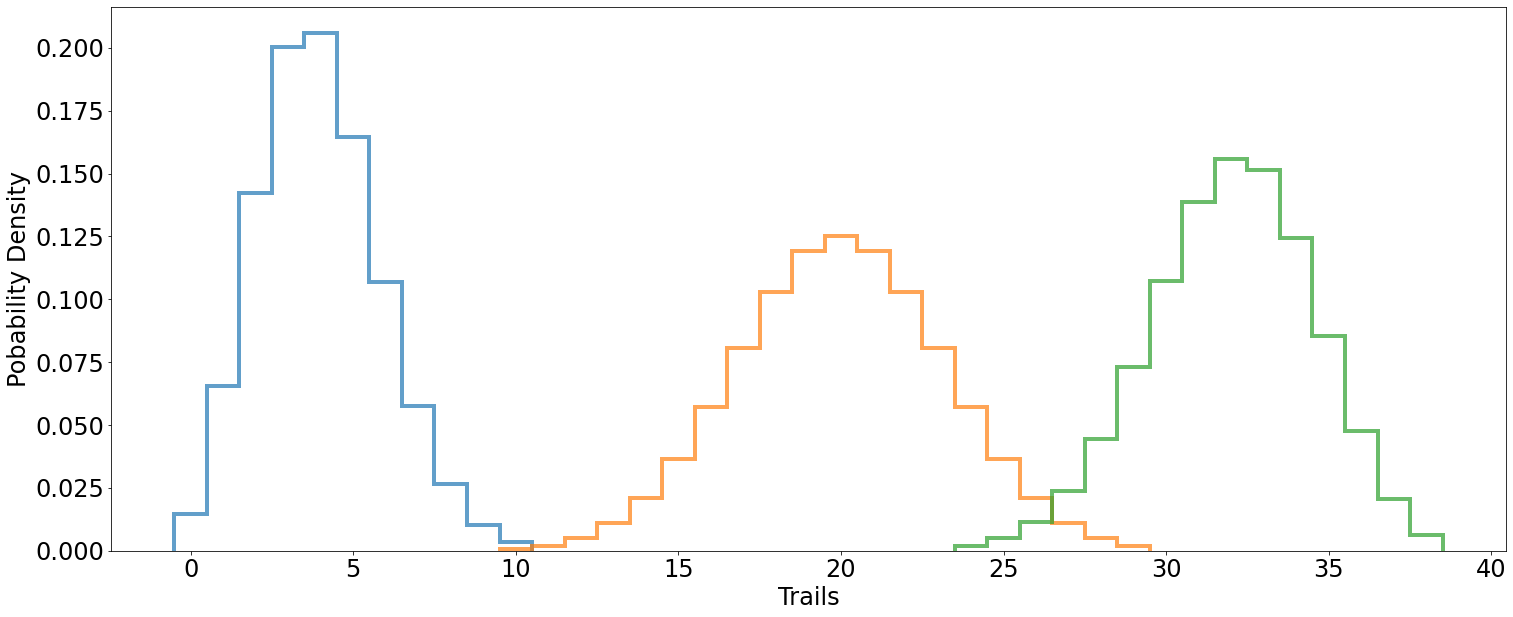

In [91]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)


n = 40
p = [0.1,0.5, 0.8]
for i in p:
    x = np.arange(stats.binom.ppf(0.001, n, i),
                  stats.binom.ppf(0.999, n, i))
    edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)

    ax.stairs(stats.binom.pmf(x, n, i), edges, linewidth = 4, alpha = 0.7)
plt.xlabel("Trails", fontsize = 24)
plt.ylabel("Pobability Density", fontsize = 24)


The above graph shows the binomial distributions for N = 40 and p = 0.1, 0.5, and 0.8. As p increases so does the mean $Np$. As the mean nears the edges, the distribution becomes narrow and tall. 

- C. If there is no signal and the signal-less data can be represented by the binomial distribution of N = 50 and p = 0.5, what is the probability of obtaining n = 33 successess? 

In [99]:
print("The probability of", 33, "successful trials is", stats.binom.pmf(33, 50, 0.5)*100, "%")

The probability of 33 successful trials is 0.8746229865818984 %


- D.  
  Because the sigmas can only take on a finite number of values depending on the data, experiments can approach the true value of some desired peice of information and cannot represent the true value since the data cannot be split into partial pieces.
  
- E. 
  The parameters that define the distribution and the ones that describe it aren't the same. The number of trials and success has to be discrete when speaking about the binomial distribution. When talking about the poisson distribution the rate of events can be continuous because the number of events in any interval is the average of events in many equal length intervals. The difference between discrete and continuous distributions is the data. 